# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + "metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amderma
City not found. Skipping...
Processing Record 2 of Set 1 | verkhnyaya inta
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | pisco
Processing Record 5 of Set 1 | lavrentiya
Processing Record 6 of Set 1 | bathsheba
Processing Record 7 of Set 1 | xghajra
City not found. Skipping...
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | sao filipe
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | salalah
Processing Record 14 of Set 1 | rawson
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 17 of Set 1 | hobyo
Processing Record 18 of Set 1 | tateyama
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | san juan del cesar
Pr

Processing Record 37 of Set 4 | nueva guinea
Processing Record 38 of Set 4 | takoradi
Processing Record 39 of Set 4 | nushki
Processing Record 40 of Set 4 | vestmannaeyjar
Processing Record 41 of Set 4 | san rafael
Processing Record 42 of Set 4 | avera
Processing Record 43 of Set 4 | la brea
Processing Record 44 of Set 4 | tuy hoa
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | port blair
Processing Record 47 of Set 4 | victoria
Processing Record 48 of Set 4 | sulangan
Processing Record 49 of Set 4 | amberley
Processing Record 0 of Set 5 | puerto asis
Processing Record 1 of Set 5 | saint george
Processing Record 2 of Set 5 | yar-sale
Processing Record 3 of Set 5 | sidi ali
Processing Record 4 of Set 5 | winchester
Processing Record 5 of Set 5 | nabire
Processing Record 6 of Set 5 | westpunt
City not found. Skipping...
Processing Record 7 of Set 5 | vardo
Processing Record 8 of Set 5 | aguililla
Processing Record 9 of Set 5 | mmathubudukwane
Processing Record 10 

City not found. Skipping...
Processing Record 28 of Set 8 | phonhong
Processing Record 29 of Set 8 | barcelos
Processing Record 30 of Set 8 | roscommon
Processing Record 31 of Set 8 | oranjemund
Processing Record 32 of Set 8 | sivas
Processing Record 33 of Set 8 | bandarbeyla
Processing Record 34 of Set 8 | luderitz
Processing Record 35 of Set 8 | deputatskiy
Processing Record 36 of Set 8 | bjornevatn
Processing Record 37 of Set 8 | dunmore town
Processing Record 38 of Set 8 | trairi
Processing Record 39 of Set 8 | saryg-sep
Processing Record 40 of Set 8 | mutoko
Processing Record 41 of Set 8 | pirgos
Processing Record 42 of Set 8 | mokhsogollokh
Processing Record 43 of Set 8 | vidim
Processing Record 44 of Set 8 | madera
Processing Record 45 of Set 8 | baker city
Processing Record 46 of Set 8 | harrisburg
Processing Record 47 of Set 8 | lethem
Processing Record 48 of Set 8 | peru
Processing Record 49 of Set 8 | nguiu
City not found. Skipping...
Processing Record 0 of Set 9 | chikwawa


Processing Record 11 of Set 12 | daru
Processing Record 12 of Set 12 | haibowan
City not found. Skipping...
Processing Record 13 of Set 12 | kiunga
Processing Record 14 of Set 12 | matera
Processing Record 15 of Set 12 | soure
Processing Record 16 of Set 12 | mazamari
Processing Record 17 of Set 12 | rio branco
Processing Record 18 of Set 12 | kandrian
Processing Record 19 of Set 12 | beyla
Processing Record 20 of Set 12 | leua
Processing Record 21 of Set 12 | ilhabela
Processing Record 22 of Set 12 | port moresby
Processing Record 23 of Set 12 | los reyes
Processing Record 24 of Set 12 | kaitangata
Processing Record 25 of Set 12 | chagda
City not found. Skipping...
Processing Record 26 of Set 12 | havoysund
Processing Record 27 of Set 12 | adrar
Processing Record 28 of Set 12 | astoria
Processing Record 29 of Set 12 | manta
Processing Record 30 of Set 12 | itarema
Processing Record 31 of Set 12 | kocevje
Processing Record 32 of Set 12 | maumere
Processing Record 33 of Set 12 | opuwo
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,verkhnyaya inta,65.9811,60.3094,-5.40,89,97,9.64,RU,1675916758
1,rikitea,-23.1203,-134.9692,26.75,73,4,6.40,PF,1675916679
2,pisco,-13.7000,-76.2167,23.03,83,0,3.09,PE,1675916429
3,lavrentiya,65.5833,-171.0000,-24.44,97,100,1.12,RU,1675916389
4,bathsheba,13.2167,-59.5167,25.34,78,20,8.75,BB,1675916510


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,verkhnyaya inta,65.9811,60.3094,-5.40,89,97,9.64,RU,1675916758
1,rikitea,-23.1203,-134.9692,26.75,73,4,6.40,PF,1675916679
2,pisco,-13.7000,-76.2167,23.03,83,0,3.09,PE,1675916429
3,lavrentiya,65.5833,-171.0000,-24.44,97,100,1.12,RU,1675916389
4,bathsheba,13.2167,-59.5167,25.34,78,20,8.75,BB,1675916510


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

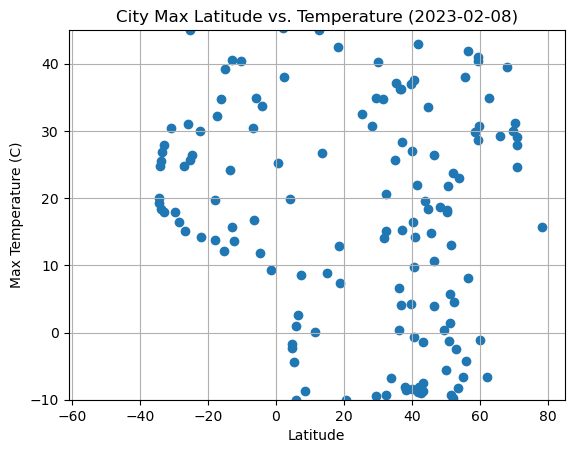

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Lng"], marker = "o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-02-08)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(visible=None, which='major', axis='both')
plt.ylim(-10,45)
plt.xlim(-61,85)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

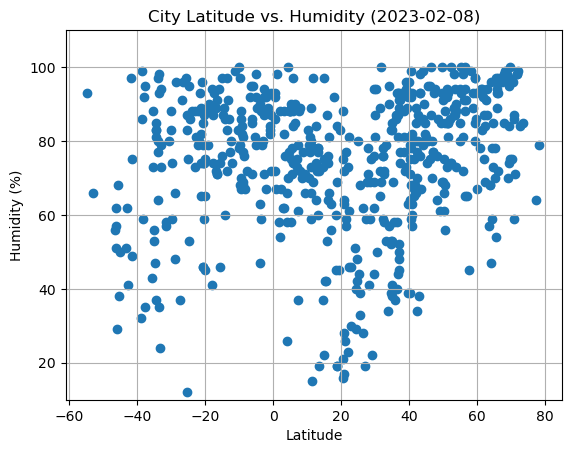

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-02-08)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(visible=None, which='major', axis='both')
plt.ylim(10,110)
plt.xlim(-61,85)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

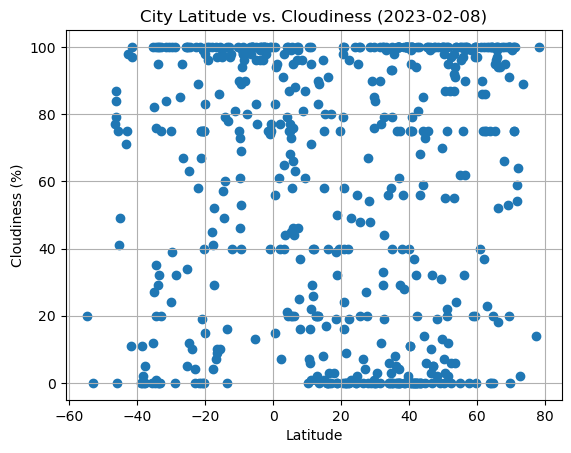

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-02-08)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(visible=None, which='major', axis='both')
plt.ylim(-5,105)
plt.xlim(-61,85)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

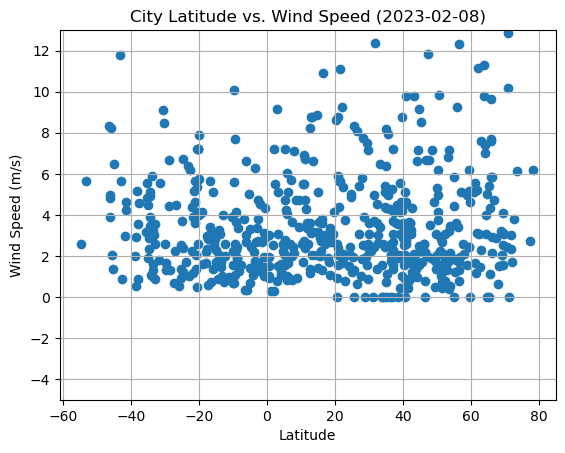

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-02-08)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(visible=None, which='major', axis='both')
plt.ylim(-5,13)
plt.xlim(-61,85)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,verkhnyaya inta,65.9811,60.3094,-5.40,89,97,9.64,RU,1675916758
3,lavrentiya,65.5833,-171.0000,-24.44,97,100,1.12,RU,1675916389
4,bathsheba,13.2167,-59.5167,25.34,78,20,8.75,BB,1675916510
7,sao filipe,14.8961,-24.4956,20.60,75,58,3.17,CV,1675916622
9,salalah,17.0151,54.0924,21.05,56,0,2.57,OM,1675916761


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rikitea,-23.1203,-134.9692,26.75,73,4,6.40,PF,1675916679
2,pisco,-13.7000,-76.2167,23.03,83,0,3.09,PE,1675916429
5,vaini,-21.2000,-175.2000,27.09,89,75,4.63,TO,1675916333
6,carnarvon,-24.8667,113.6333,30.79,53,63,6.73,AU,1675916676
8,lebu,-37.6167,-73.6500,14.75,95,5,4.59,CL,1675916615


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7797333222501316


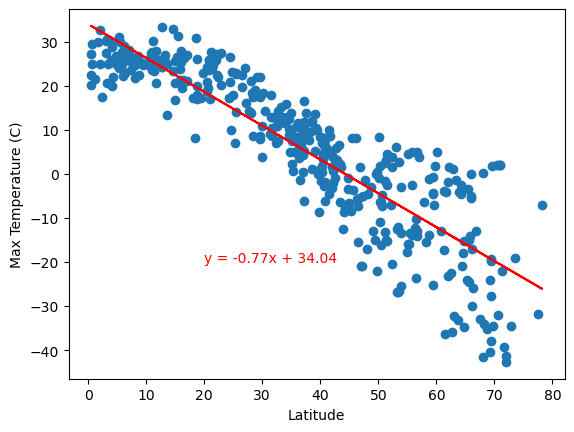

In [14]:
#Linear regression on Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
north_temp_y_pred = northern_hemi_df["Lat"] * slope + intercept
north_temp_line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The r-value is: {rvalue**2}")

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker = "o")
plt.plot(northern_hemi_df["Lat"], north_temp_y_pred, color = "r")
plt.annotate(north_temp_line_equation, (20,-20), fontsize = 10, color = "r")

plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

plt.show()


The r-value is: 0.19398409919897075


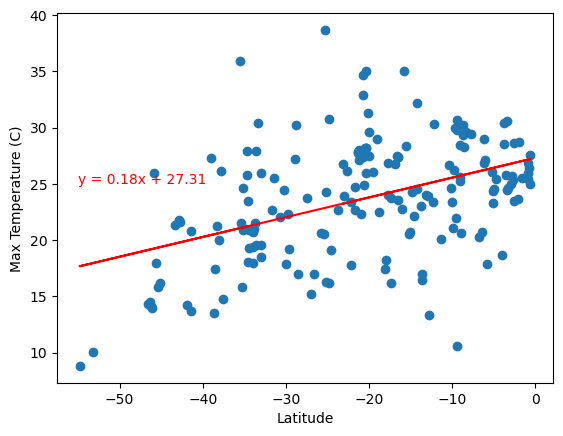

In [15]:
# Linear regression on Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
south_temp_y_pred = southern_hemi_df["Lat"] * slope + intercept
south_temp_line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The r-value is: {rvalue**2}")

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker = "o")
plt.plot(southern_hemi_df["Lat"], south_temp_y_pred, color = "r")
plt.annotate(south_temp_line_equation, (-55, 25), fontsize = 10, color = "r")

plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and the maximum temperature in the northern hemisphere.  The closer to the equator the warmer the temperatures are.  There is a positive correlation between latitude and the maximum temperature in the southern hemisphere.  The closer to the equator the warmer the temperatures are. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09674713006366852


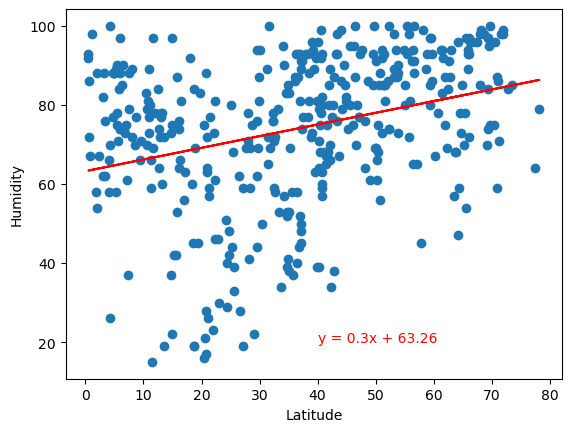

In [16]:
# Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
north_hum_y_pred = northern_hemi_df["Lat"] * slope + intercept
north_hum_line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The r-value is: {rvalue**2}")

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker = "o")
plt.plot(northern_hemi_df["Lat"], north_hum_y_pred, color = "r")
plt.annotate(north_hum_line_equation, (40, 20), fontsize = 10, color = "r")

plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.show()

The r-value is: 0.12488496572977774


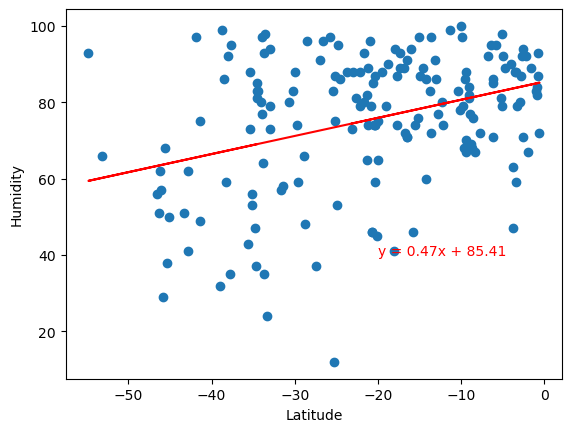

In [17]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
south_hum_y_pred = southern_hemi_df["Lat"] * slope + intercept
south_hum_line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The r-value is: {rvalue**2}")

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker = "o")
plt.plot(southern_hemi_df["Lat"], south_hum_y_pred, color = "r")
plt.annotate(south_hum_line_equation, (-20, 40), fontsize = 10, color = "r")

plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:** Latitude likely does not explain humidity (very weak positive correlation) on either the northern or southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03121935089194447


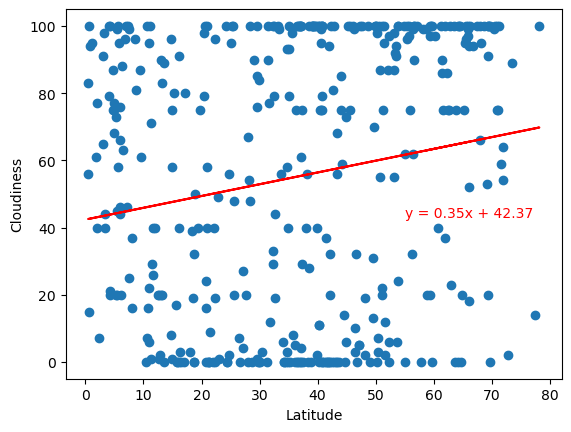

In [18]:
# Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
north_cloud_y_pred = northern_hemi_df["Lat"] * slope + intercept
north_cloud_line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The r-value is: {rvalue**2}")

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker = "o")
plt.plot(northern_hemi_df["Lat"], north_cloud_y_pred, color = "r")
plt.annotate(north_cloud_line_equation, (55, 43), fontsize = 10, color = "r")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.show()

The r-value is: 0.15263560114270416


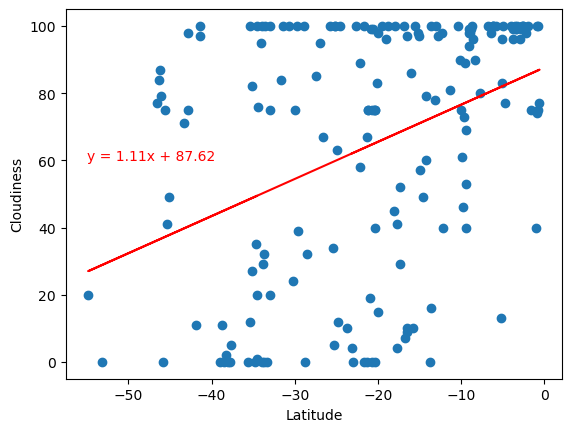

In [19]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
south_cloud_y_pred = southern_hemi_df["Lat"] * slope + intercept
south_cloud_line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The r-value is: {rvalue**2}")

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker = "o")
plt.plot(southern_hemi_df["Lat"], south_cloud_y_pred, color = "r")
plt.annotate(south_cloud_line_equation, (-55, 60), fontsize = 10, color = "r")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:** There is a slight correlation between latitude and humidity in the northern and southern.  Latitude likely does not contribute to humidity.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01954636497746745


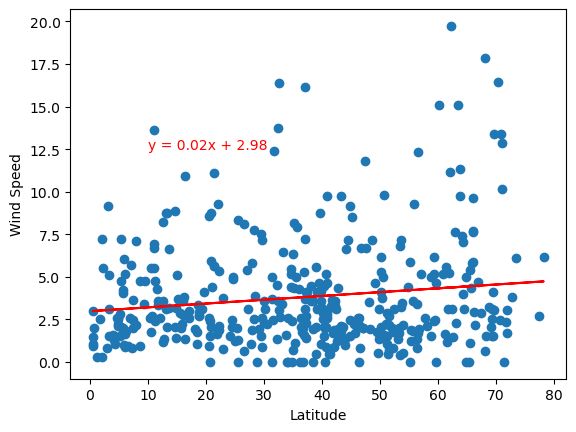

In [20]:
# Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
north_wind_y_pred = northern_hemi_df["Lat"] * slope + intercept
north_wind_line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The r-value is: {rvalue**2}")

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker = "o")
plt.plot(northern_hemi_df["Lat"], north_wind_y_pred, color = "r")
plt.annotate(north_wind_line_equation, (10, 12.5), fontsize = 10, color = "r")

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.show()

The r-value is: 0.05417580888915526


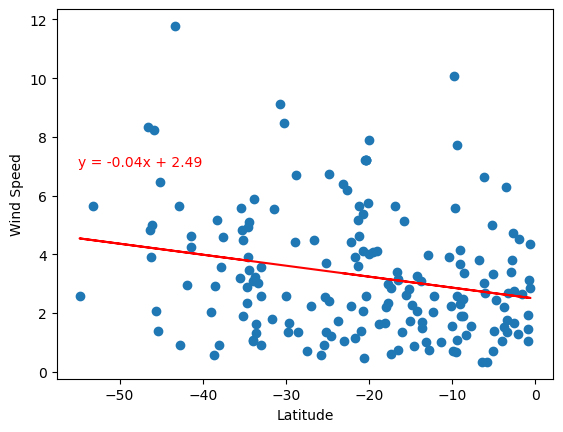

In [21]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
south_wind_y_pred = southern_hemi_df["Lat"] * slope + intercept
south_wind_line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The r-value is: {rvalue**2}")

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker = "o")
plt.plot(southern_hemi_df["Lat"], south_wind_y_pred, color = "r")
plt.annotate(south_wind_line_equation, (-55, 7), fontsize = 10, color = "r")

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:** There is a slight correlation between latitude and cloudiness in the northern (positive) and southern (negative.  Latitude likely does not contribute to cloudiness.